In [1]:
import pylab as plt 
import pandas as pd
import numpy as np
from astropy.constants import R_earth, m_e, c
from astropy import units
from tqdm import tqdm
from scipy.constants import elementary_charge

In [2]:
from plotting_utils import add_earth

In [3]:
def plot(df_sub, fname=None):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    cmap = plt.get_cmap('viridis')
    for i in [0]:#range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'z{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Z (SM)')
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    plt.xlim(-1, 7)
    plt.ylim(-3, 3)
    add_earth()
    plt.gca().set_aspect("equal")
        
    plt.subplot(122)
    cmap = plt.get_cmap('viridis')
    for i in [0]:#range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'y{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Y (SM)')
    plt.xlim(-1, 7)
    plt.ylim(-7, 7)
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    add_earth()
    plt.gca().set_aspect("equal")
    
    if fname:
        plt.savefig(fname)
        plt.close()


43


(88.0219432060382, 88.02194398794812, 0.9999999911168751)

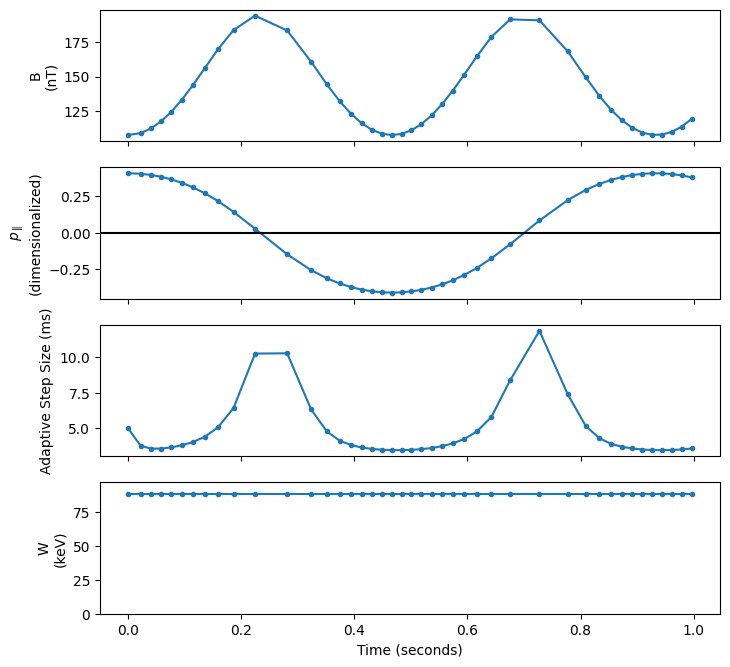

In [32]:
df = pd.read_csv('data/test_dipole.csv')
print(len(df.index))


sf = c / R_earth
t = (df['t0'].values / sf).to(units.s).value

q = - elementary_charge * units.C
sf = (q * R_earth / (m_e * c**2))
B = (df['B0'].values * units.s/ R_earth / sf).to(units.nT)

p = df['ppar0'].values
W = (df['W0'].values * (m_e * c**2)).to(units.keV).value
#print(df['W0'].values)
fig, axes = plt.subplots(4, 1,sharex=True, figsize=(8, 8), dpi=100)
axes[0].plot(t, B, '.-')
axes[0].set_ylabel('B\n(nT)')
axes[1].plot(t, p, '.-')
axes[1].set_ylabel(r'$p_\parallel$' +'\n(dimensionalized)')
axes[1].axhline(0, color='k')
axes[2].plot(t, (df['h0'].values * R_earth / c).to(units.ms).value, '.-')
axes[2].set_ylabel('Adaptive Step Size (ms)')
axes[3].plot(t, W, '.-')
axes[3].set_ylabel('W\n(keV)')
axes[3].set_ylim(0, W.max() * 1.1)
axes[3].set_xlabel('Time (seconds)')

W[1], W[-1], W[1]/W[-1]

In [5]:
df.head()

,Unnamed: 0,t0,x0,y0,z0,ppar0,B0,W0,h0,t50,...,W400,h400,t450,x450,y450,z450,ppar450,B450,W450,h450
0,0,0.235017,6.592665,0.002163,0.056767,0.405934,-3.382742e+10,28595.454818,0.256319,0.235017,...,28595.454818,0.256319,0.235017,6.592665,0.002163,0.056767,0.405934,-3.382742e+10,28595.454818,0.256319
1,1,0.491336,6.583237,0.004519,0.118057,0.403129,-7.125786e+10,41503.399094,0.273875,0.491336,...,41503.399094,0.273875,0.491336,6.583237,0.004519,0.118057,0.403129,-7.125786e+10,41503.399094,0.273875
2,2,0.765211,6.572956,0.007006,0.183077,0.400267,-1.118580e+11,51999.958122,0.288215,0.765211,...,51999.958122,0.288215,0.765211,6.572956,0.007006,0.183077,0.400267,-1.118580e+11,51999.958122,0.288215
3,3,1.053426,6.561861,0.009593,0.250990,0.397396,-1.552438e+11,61260.109359,0.299871,1.053426,...,61260.109359,0.299871,1.053426,6.561861,0.009593,0.250990,0.397396,-1.552438e+11,61260.109359,0.299871
4,4,1.353297,6.549968,0.012250,0.321108,0.394550,-2.010821e+11,69720.140464,0.309342,1.353297,...,69720.140464,0.309342,1.353297,6.549968,0.012250,0.321108,0.394550,-2.010821e+11,69720.140464,0.309342


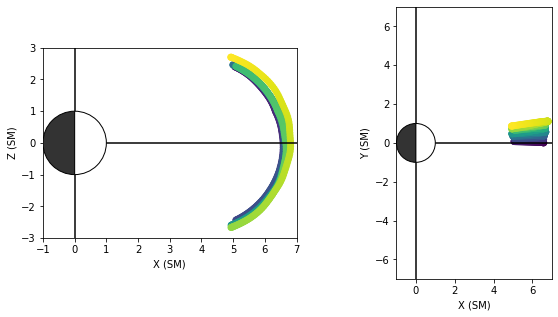

In [16]:
plot(df)

In [ ]:
import joblib
tasks = []

for i in range(len(df.index)):
    tasks.append(joblib.delayed(plot)(df.iloc[i:i+100], 'plots/%04d.png' % i))
    
print(f'Tasks: {len(tasks)}')

joblib.Parallel(n_jobs=-1, verbose=1)(tasks)

Tasks: 81671


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |